# House Price Prediction - Exploration

This analysis deals with the prediction of house prices based on the house's properties. The prediction is based on a sample of houses from Ames, Iowa. The dataset itself is obtained from [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) as part of a competition.

## Extract-Transform-Load (ETL)

In [1]:
import pandas as pd

In [2]:
houses = pd.read_csv("../data/raw/train.csv")
houses.set_index("Id", inplace=True)

In [3]:
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We have round about eighty numerical/categorical input features and one target variable, containing the price of the respective house.

## Exporative Data Analysis (EDA)

In [4]:
import matplotlib.pyplot as plt

In [5]:
houses.isna().sum()[houses.isna().sum() > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### House Type

First of all let's take a look at the type of house.

- `MSSubClass`:     Identifies the type of dwelling involved in the sale.
- `BldgType`:       Type of dwelling.
- `HouseStyle`:     Style of dwelling.
- `YearBuilt`:      Original construction date.
- `YearRemodAdd`:   Remodel date (same as construction date if no remodeling or additions).

In [6]:
houses[["MSSubClass", "BldgType", "HouseStyle", "YearBuilt", "YearRemodAdd"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   BldgType      1460 non-null   object
 2   HouseStyle    1460 non-null   object
 3   YearBuilt     1460 non-null   int64 
 4   YearRemodAdd  1460 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 68.4+ KB


In [7]:
houses[["MSSubClass", "BldgType", "HouseStyle", "YearBuilt", "YearRemodAdd"]].isna().sum()

MSSubClass      0
BldgType        0
HouseStyle      0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [8]:
houses["MSSubClass"].replace({
    20: "1-STORY 1946 & NEWER ALL STYLES (20)",
    30: "1-STORY 1945 & OLDER (30)",
    40: "1-STORY W/FINISHED ATTIC ALL AGES (40)",
    45: "1-1/2 STORY - UNFINISHED ALL AGES (45)",
    50: "1-1/2 STORY FINISHED ALL AGES (50)",
    60: "2-STORY 1946 & NEWER (60)",
    70: "2-STORY 1945 & OLDER (70)",
    75: "2-1/2 STORY ALL AGES (75)",
    80: "SPLIT OR MULTI-LEVEL (80)",
    85: "SPLIT FOYER (85)",
    90: "DUPLEX - ALL STYLES AND AGES (90)",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER (120)",
    150: "1-1/2 STORY PUD - ALL AGES (150)",
    160: "2-STORY PUD - 1946 & NEWER (160)",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER (180)",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES (190)"}, inplace=True)

houses["BldgType"].replace({
    "1Fam": "Single-family Detached (1Fam)",
    "2FmCon": "Two-family Conversion; originally built as one-family dwelling (2FmCon)",
    "Duplx": "Duplex (Duplx)",
    "TwnhsE": "Townhouse End Unit (TwnhsE)",
    "TwnhsI": "Townhouse Inside Unit (TwnhsI)"}, inplace=True)

houses["HouseStyle"].replace({
    "1Story": "One story (1Story)",
    "1.5Fin": "One and one-half story: 2nd level finished (1.5Fin)",
    "1.5Unf": "One and one-half story: 2nd level unfinished (1.5Unf)",
    "2Story": "Two story (2Story)",
    "2.5Fin": "Two and one-half story: 2nd level finished (2.5Fin)",
    "2.5Unf": "Two and one-half story: 2nd level unfinished (2.5Unf)",
    "SFoyer": "Split Foyer (SFoyer)",
    "SLvl": "Split Level (SLvl)"}, inplace=True)

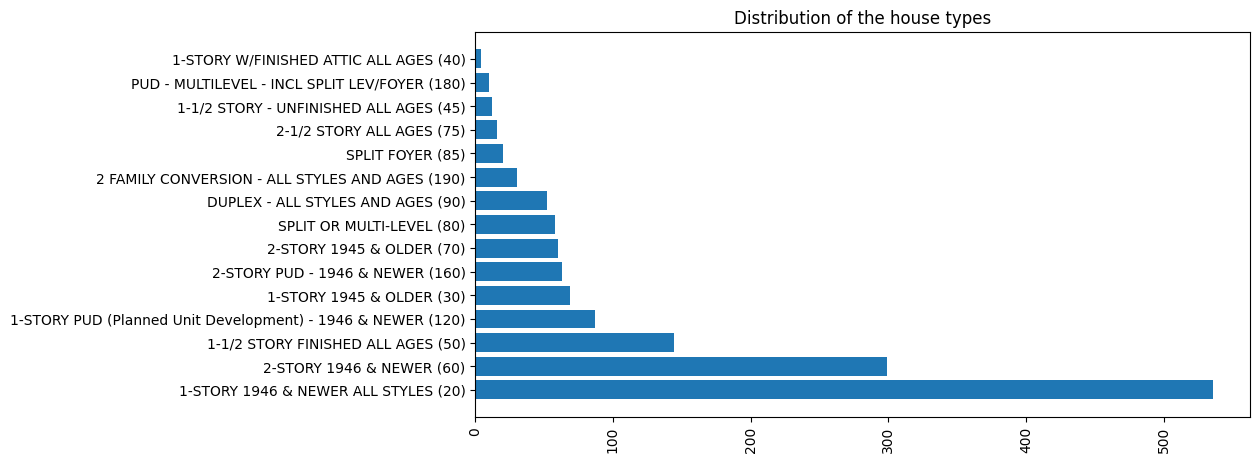

In [9]:
house_type_counts = houses.groupby("MSSubClass")["MSSubClass"].count().sort_values(ascending=False)

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Distribution of the house types")
ax.barh(house_type_counts.index, house_type_counts)
ax.tick_params(axis="x", rotation=90)

plt.show()

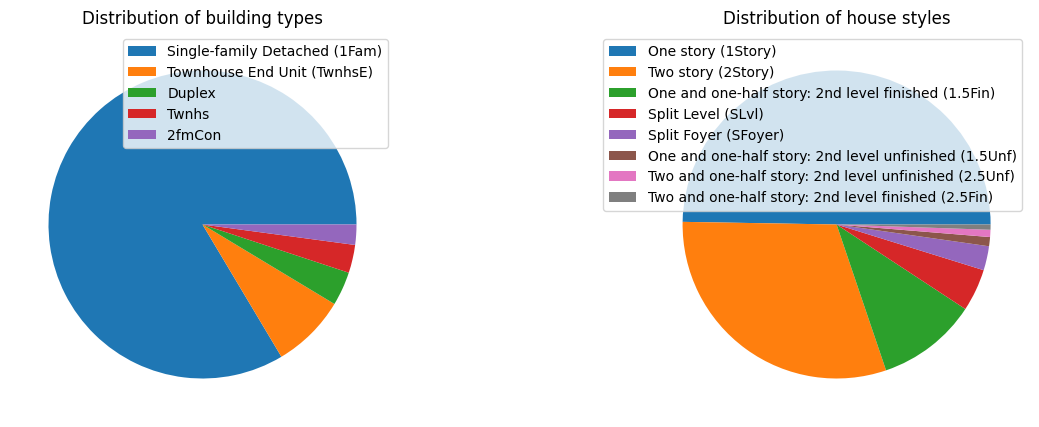

In [10]:
building_type_counts = houses.groupby("BldgType")["BldgType"].count().sort_values(ascending=False)
house_style_counts = houses.groupby("HouseStyle")["HouseStyle"].count().sort_values(ascending=False)

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Distribution of building types")
ax1.pie(building_type_counts)
ax1.legend(labels=building_type_counts.index)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Distribution of house styles")
ax2.pie(house_style_counts)
ax2.legend(labels=house_style_counts.index)

plt.show()

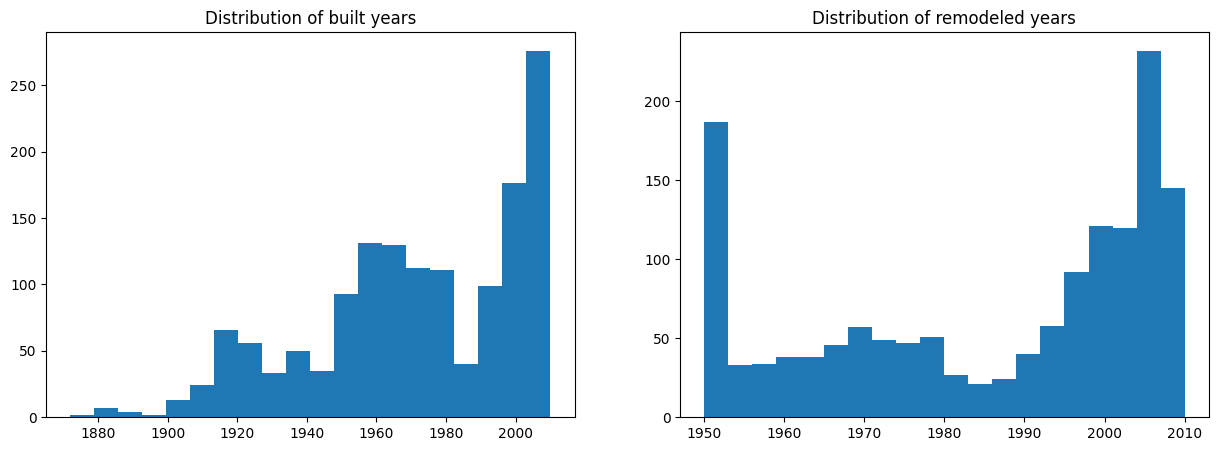

In [11]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Distribution of built years")
ax1.hist(houses["YearBuilt"], bins=20)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Distribution of remodeled years")
ax2.hist(houses["YearRemodAdd"], bins=20)

plt.show()

### Lot/Property

Next we take a look at the lot itself, independent to the house on it.

- `LotFrontage`:    Linear feet of street connected to property.
- `LotArea`:        Lot size in square feet.
- `LotShape`:       General shape of property. 
- `LotConfig`:      Lot configuration.
- `LandContour`:    Flatness of the property.
- `LandSlope`:      Slope of property.

In [12]:
houses[["LotFrontage", "LotArea", "LotShape", "LotConfig", "LandContour", "LandSlope"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   LotArea      1460 non-null   int64  
 2   LotShape     1460 non-null   object 
 3   LotConfig    1460 non-null   object 
 4   LandContour  1460 non-null   object 
 5   LandSlope    1460 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 79.8+ KB


In [13]:
houses[["LotFrontage", "LotArea", "LotShape", "LotConfig", "LandContour", "LandSlope"]].isna().sum()

LotFrontage    259
LotArea          0
LotShape         0
LotConfig        0
LandContour      0
LandSlope        0
dtype: int64

In [14]:
houses["LotFrontage"][houses["LotFrontage"] == 0].count()

0

A missing value in `LotFrontage` may represent a missing connection to the road. These could be houses that can be reached, for example, via a pedestrian path, but not by car.

In [15]:
houses["LotShape"].replace({
    "Reg": "Regular (Reg)",
    "IR1": "Slightly irregular (IR1)",
    "IR2": "Moderately Irregular (IR2)",
    "IR3": "Irregular (IR3)"}, inplace=True)

houses["LotConfig"].replace({
    "Inside": "Inside lot (Inside)",
    "Corner": "Corner lot (Corner)",
    "CulDSac": "Cul-de-sac (CulDSac)",
    "FR2": "Frontage on 2 sides of property (FR2)",
    "FR3": "Frontage on 3 sides of property (FR3)"}, inplace=True)

houses["LandContour"].replace({
    "Lvl": "Near Flat/Level (Lvl)",
    "Bnk": "Banked - Quick and significant rise from street grade to building (Bnk)",
    "HLS": "Hillside - Significant slope from side to side (HLS)",
    "Low": "Depression"}, inplace=True)

houses["LandSlope"].replace({
    "Gtl": "Gentle slope (Gtl)",
    "Mod": "Moderate Slope (Mod)",
    "Sev": "Severe Slope (Sev)"}, inplace=True)

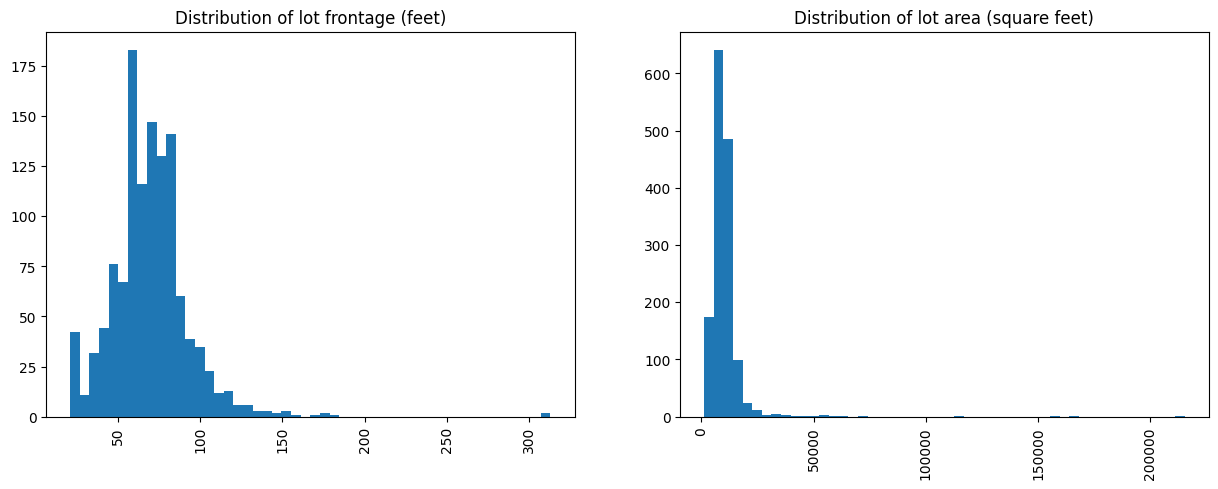

In [16]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Distribution of lot frontage (feet)")
ax1.hist(houses["LotFrontage"].dropna(), bins=50)
ax1.tick_params(axis="x", rotation=90)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Distribution of lot area (square feet)")
ax2.hist(houses["LotArea"], bins=50)
ax2.tick_params(axis="x", rotation=90)

plt.show()

In [17]:
houses[["LotFrontage", "LotArea"]].dropna().describe()

,LotFrontage,LotArea
count,1201.000000,1201.000000
mean,70.049958,9951.698585
std,24.284752,7924.353975
min,21.000000,1300.000000
25%,59.000000,7420.000000
50%,69.000000,9262.000000
75%,80.000000,11249.000000
max,313.000000,215245.000000


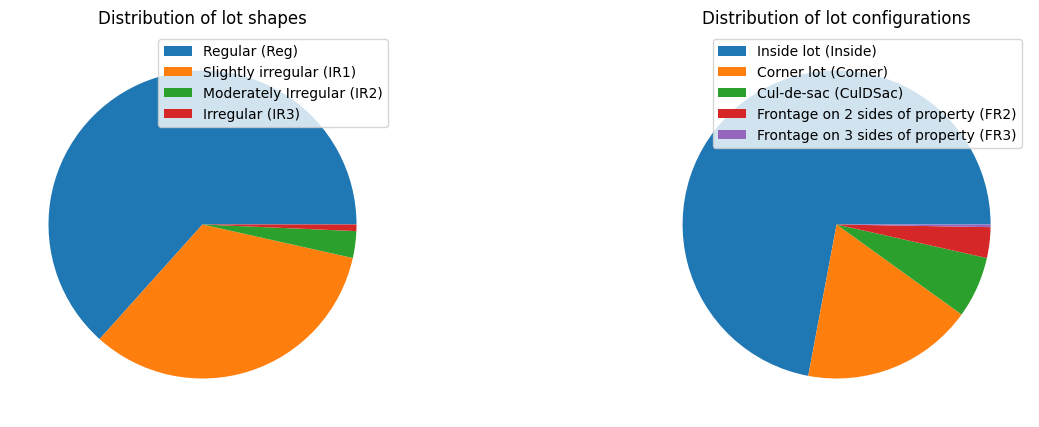

In [18]:
lot_shape_counts = houses.groupby("LotShape")["LotShape"].count().sort_values(ascending=False)
lot_config_counts = houses.groupby("LotConfig")["LotConfig"].count().sort_values(ascending=False)

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Distribution of lot shapes")
ax1.pie(lot_shape_counts)
ax1.legend(labels=lot_shape_counts.index)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Distribution of lot configurations")
ax2.pie(lot_config_counts)
ax2.legend(labels=lot_config_counts.index)

plt.show()

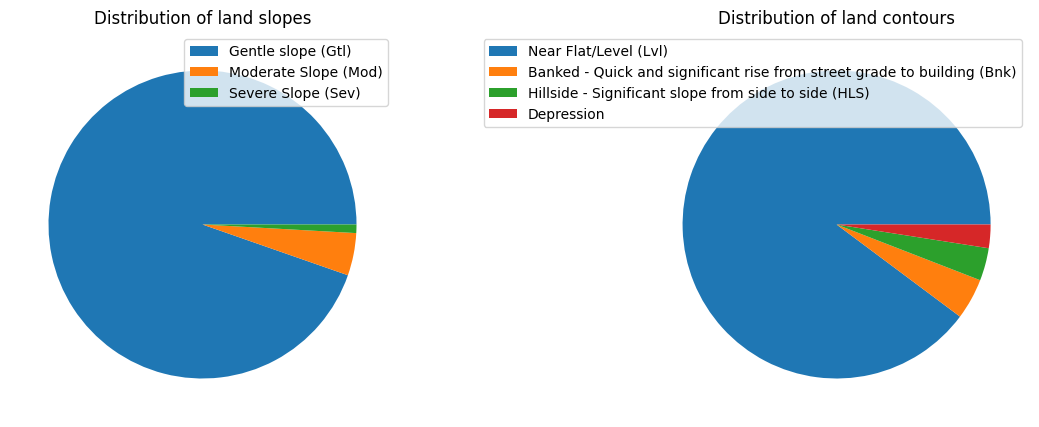

In [19]:
land_slope_counts = houses.groupby("LandSlope")["LandSlope"].count().sort_values(ascending=False)
land_contour_counts = houses.groupby("LandContour")["LandContour"].count().sort_values(ascending=False)

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Distribution of land slopes")
ax1.pie(land_slope_counts)
ax1.legend(labels=land_slope_counts.index)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Distribution of land contours")
ax2.pie(land_contour_counts)
ax2.legend(labels=land_contour_counts.index)

plt.show()

### Utilities

We consider the connection of the house, therefore the driveway, road connection and the connection to the infrastructure such as electricity and gas.

- `Street`:     Type of road access to property
- `Alley`:      Type of alley access to property.
- `PavedDrive`: Paved driveway.
- `Utilities`:  Type of utilities available.

In [20]:
houses[["Street", "Alley", "Utilities", "PavedDrive"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Street      1460 non-null   object
 1   Alley       91 non-null     object
 2   Utilities   1460 non-null   object
 3   PavedDrive  1460 non-null   object
dtypes: object(4)
memory usage: 57.0+ KB


In [21]:
houses[["Street", "Alley", "Utilities", "PavedDrive"]].isna().sum()

Street           0
Alley         1369
Utilities        0
PavedDrive       0
dtype: int64

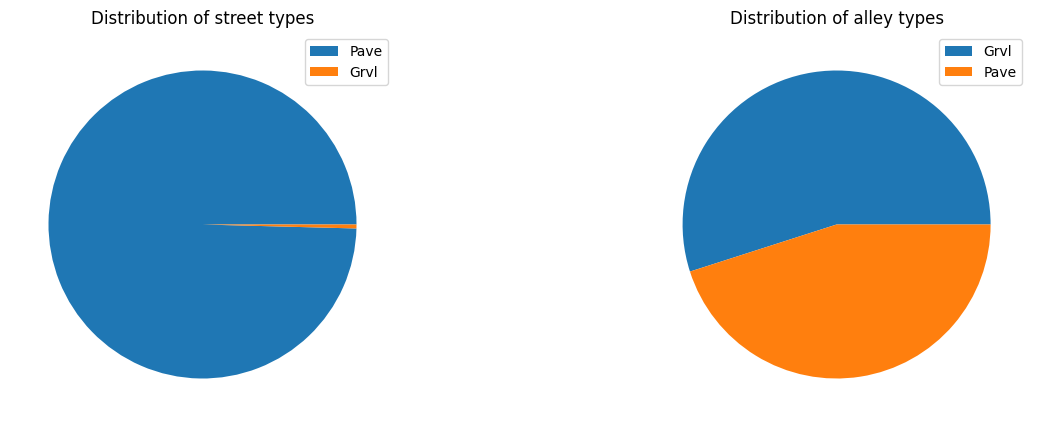

In [22]:
street_type_counts = houses.groupby("Street")["Street"].count().sort_values(ascending=False)
alley_type_counts = houses.groupby("Alley")["Alley"].count().sort_values(ascending=False)

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Distribution of street types")
ax1.pie(street_type_counts)
ax1.legend(labels=street_type_counts.index)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Distribution of alley types")
ax2.pie(alley_type_counts)
ax2.legend(labels=alley_type_counts.index)

plt.show()

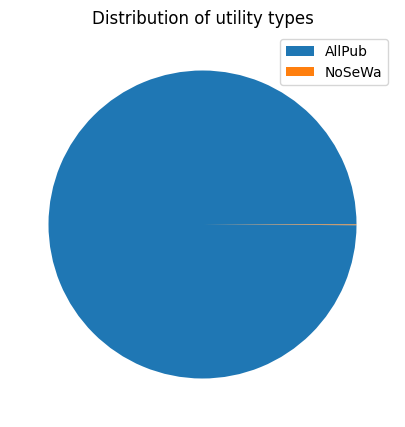

In [23]:
utility_type_counts = houses.groupby("Utilities")["Utilities"].count().sort_values(ascending=False)

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Distribution of utility types")
ax.pie(utility_type_counts)
ax.legend(labels=utility_type_counts.index)

plt.show()

### Neighborhood & Location

In this step we take a look at the neighborhood and the social environment of the house.

- `MSZoning`:       Identifies the general zoning classification of the sale.
- `Neighborhood`:   Physical locations within Ames city limits.
- `Condition1`:     Proximity to various conditions.
- `Condition2`:     Proximity to various conditions (if more than one is present).

In [24]:
houses[["MSZoning", "Neighborhood", "Condition1", "Condition2"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   Neighborhood  1460 non-null   object
 2   Condition1    1460 non-null   object
 3   Condition2    1460 non-null   object
dtypes: object(4)
memory usage: 57.0+ KB


In [25]:
houses[["MSZoning", "Neighborhood", "Condition1", "Condition2"]].isna().sum()

MSZoning        0
Neighborhood    0
Condition1      0
Condition2      0
dtype: int64

In [26]:
houses["MSZoning"].replace({
    "A": "Agriculture (A)",
    "C (all)": "Commercial (C)",
    "FV": "Floating Village Residential (FV)",
    "I": "Industrial",
    "RH": "Residential High Density (RH)",
    "RL": "Residential Low Density (RL)",
    "RP": "Residential Low Density Park (RP)",
    "RM": "Residential Medium Density (RM)"}, inplace=True)

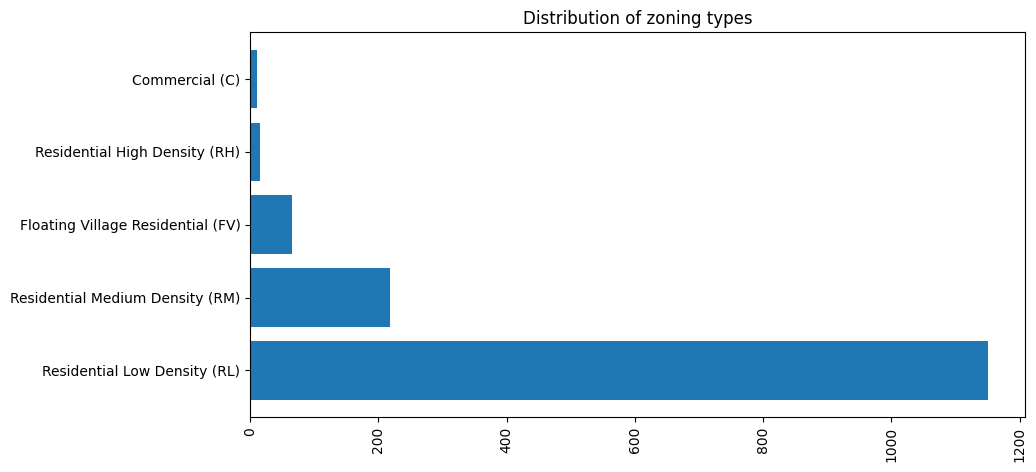

In [27]:
zoning_type_counts = houses.groupby("MSZoning")["MSZoning"].count().sort_values(ascending=False)

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Distribution of zoning types")
ax.barh(zoning_type_counts.index, zoning_type_counts)
ax.tick_params(axis="x", rotation=90)

plt.show()

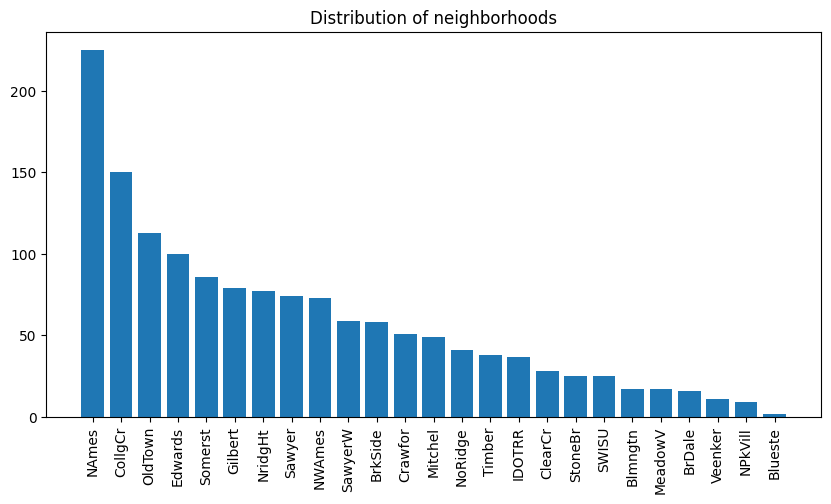

In [28]:
neighborhoos_counts = houses.groupby("Neighborhood")["Neighborhood"].count().sort_values(ascending=False)

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Distribution of neighborhoods")
ax.bar(neighborhoos_counts.index, neighborhoos_counts)
ax.tick_params(axis="x", rotation=90)

plt.show()

### Garage

Some of the houses has a separate garage for cars and other vehicles. Let's take a look on it.

- `GarageType`:     Garage location.
- `GarageYrBlt`:    Year garage was built.
- `GarageFinish`:   Interior finish of the garage.
- `GarageCars`:     Size of garage in car capacity
- `GarageArea`:     Size of garage in square feet
- `GarageQual`:     Garage quality
- `GarageCond`:     Garage condition

In [29]:
houses[["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1379 non-null   object 
 1   GarageYrBlt   1379 non-null   float64
 2   GarageFinish  1379 non-null   object 
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   GarageQual    1379 non-null   object 
 6   GarageCond    1379 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 91.2+ KB


In [30]:
houses[["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]].isna().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64

As we can see, we've an equal number of missing values over all garage specific columns. One explanation would be that in accordance with the data sheet, missing values represent missing garages.

In [31]:
print("Number of GarageYrBlt is 'NA' and garage exists: {}".format(houses[~pd.isna(houses["GarageType"])]["GarageYrBlt"].isna().sum()))
print("Number of GaragFinish is 'NA' and garage exists: {}".format(houses[~pd.isna(houses["GarageType"])]["GarageFinish"].isna().sum()))
print("Number of GarageQual is 'NA' and garage exists: {}".format(houses[~pd.isna(houses["GarageType"])]["GarageQual"].isna().sum()))
print("Number of GarageCond is 'NA' and garage exists: {}".format(houses[~pd.isna(houses["GarageType"])]["GarageCond"].isna().sum()))
print("Number of GarageCars is 'NA' and garage exists: {}".format(houses[~pd.isna(houses["GarageType"])]["GarageCars"].isna().sum()))
print("Number of GarageArea is 'NA' and garage exists: {}".format(houses[~pd.isna(houses["GarageType"])]["GarageArea"].isna().sum()))

Number of GarageYrBlt is 'NA' and garage exists: 0
Number of GaragFinish is 'NA' and garage exists: 0
Number of GarageQual is 'NA' and garage exists: 0
Number of GarageCond is 'NA' and garage exists: 0
Number of GarageCars is 'NA' and garage exists: 0
Number of GarageArea is 'NA' and garage exists: 0


### Supplies

Next, we look at the available energy sources, the type of heating and the energy infrastructure.

- `Heating`:    Type of heating.
- `HeatingQC`:  Heating quality and condition.
- `CentralAir`: Central air conditioning.
- `Electrical`: Electrical system.

In [32]:
houses[["Heating", "HeatingQC", "CentralAir", "Electrical"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Heating     1460 non-null   object
 1   HeatingQC   1460 non-null   object
 2   CentralAir  1460 non-null   object
 3   Electrical  1459 non-null   object
dtypes: object(4)
memory usage: 57.0+ KB


In [33]:
houses[["Heating", "HeatingQC", "CentralAir", "Electrical"]].isna().sum()

Heating       0
HeatingQC     0
CentralAir    0
Electrical    1
dtype: int64

### Basement

Some houses also have a basement.

- `BsmtQual`:       Evaluates the height of the basement.
- `BsmtCond`:       Evaluates the general condition of the basement.
- `BsmtExposure`:   Refers to walkout or garden level walls.
- `BsmtFinType1`:   Rating of basement finished area.
- `BsmtFinSF1`:     Type 1 finished square feet.
- `BsmtFinType2`:   Rating of basement finished area (if multiple types).
- `BsmtFinSF2`:     Type 2 finished square feet.
- `BsmtUnfSF`:      Unfinished square feet of basement area.
- `TotalBsmtSF`:    Total square feet of basement area.
- `BsmtFullBath`:   Basement full bathrooms.
- `BsmtHalfBath`:   Basement half bathrooms.

In [34]:
houses[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1423 non-null   object
 1   BsmtCond      1423 non-null   object
 2   BsmtExposure  1422 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinSF2    1460 non-null   int64 
 7   BsmtUnfSF     1460 non-null   int64 
 8   TotalBsmtSF   1460 non-null   int64 
 9   BsmtFullBath  1460 non-null   int64 
 10  BsmtHalfBath  1460 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 136.9+ KB


In [35]:
houses[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [36]:
print("Number of BsmtCond is 'NA' and basement exists: {}".format(houses[~pd.isna(houses["BsmtQual"])]["BsmtCond"].isna().sum()))
print("Number of BsmtExposure is 'NA' and basement exists: {}".format(houses[~pd.isna(houses["BsmtQual"])]["BsmtExposure"].isna().sum()))
print("Number of BsmtFinType1 is 'NA' and basement exists: {}".format(houses[~pd.isna(houses["BsmtQual"])]["BsmtFinType1"].isna().sum()))
print("Number of BsmtFinType2 is 'NA' and basement exists: {}".format(houses[~pd.isna(houses["BsmtQual"])]["BsmtFinType2"].isna().sum()))
print("Number of BsmtFinSF1 is 'NA' and basement exists: {}".format(houses[~pd.isna(houses["BsmtQual"])]["BsmtFinSF1"].isna().sum()))
print("Number of BsmtFinSF2 is 'NA' and basement exists: {}".format(houses[~pd.isna(houses["BsmtQual"])]["BsmtFinSF2"].isna().sum()))
print("Number of BsmtUnfSF is 'NA' and basement exists: {}".format(houses[~pd.isna(houses["BsmtQual"])]["BsmtUnfSF"].isna().sum()))
print("Number of TotalBsmtSF is 'NA' and basement exists: {}".format(houses[~pd.isna(houses["BsmtQual"])]["TotalBsmtSF"].isna().sum()))
print("Number of BsmtFullBath is 'NA' and basement exists: {}".format(houses[~pd.isna(houses["BsmtQual"])]["BsmtFullBath"].isna().sum()))
print("Number of BsmtHalfBath is 'NA' and basement exists: {}".format(houses[~pd.isna(houses["BsmtQual"])]["BsmtHalfBath"].isna().sum()))

Number of BsmtCond is 'NA' and basement exists: 0
Number of BsmtExposure is 'NA' and basement exists: 1
Number of BsmtFinType1 is 'NA' and basement exists: 0
Number of BsmtFinType2 is 'NA' and basement exists: 1
Number of BsmtFinSF1 is 'NA' and basement exists: 0
Number of BsmtFinSF2 is 'NA' and basement exists: 0
Number of BsmtUnfSF is 'NA' and basement exists: 0
Number of TotalBsmtSF is 'NA' and basement exists: 0
Number of BsmtFullBath is 'NA' and basement exists: 0
Number of BsmtHalfBath is 'NA' and basement exists: 0


### Fireplaces

Some houses have a fireplace in the garden. This feature will be highlighted next.

- `Fireplaces`:     Number of fireplaces.
- `FireplaceQu`:    Fireplace quality.

In [37]:
houses[["Fireplaces", "FireplaceQu"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fireplaces   1460 non-null   int64 
 1   FireplaceQu  770 non-null    object
dtypes: int64(1), object(1)
memory usage: 34.2+ KB


In [38]:
houses[["Fireplaces", "FireplaceQu"]].isna().sum()

Fireplaces       0
FireplaceQu    690
dtype: int64

In [39]:
print("Number of FireplaceQu is 'NA' and fireplace exists: {}".format(houses[houses["Fireplaces"] >= 1]["FireplaceQu"].isna().sum()))

Number of FireplaceQu is 'NA' and fireplace exists: 0


### Pool

Some of the expensive houses have a pool. This feature will be explored next.

- `PoolArea`:   Pool area in square feet.
- `PoolQC`:     Pool quality.

In [40]:
houses[["PoolArea", "PoolQC"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PoolArea  1460 non-null   int64 
 1   PoolQC    7 non-null      object
dtypes: int64(1), object(1)
memory usage: 34.2+ KB


In [41]:
houses[["PoolArea", "PoolQC"]].isna().sum()

PoolArea       0
PoolQC      1453
dtype: int64

Let's check if both properties of the pool are missing. If the values for both properties are missing, this indicates that the pool is missing (the values are missing on purpose). If only one of the two values is missing, there is probably an error in the data. So the question is, are there entries with a lack of pool quality, even though there should be a pool based on the surface area?

In [42]:
print("Number of PoolQC is 'NA' and pool exists: {}".format(houses[houses["PoolArea"] > 0]["PoolQC"].isna().sum()))

Number of PoolQC is 'NA' and pool exists: 0


### Kitchens

Next take a look at available kitchens.

- `Kitchen (KitchenAbvGr)`: Kitchens above grade.
- `KitchenQual`:            Kitchen quality.

In [43]:
houses[["KitchenAbvGr", "KitchenQual"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   KitchenAbvGr  1460 non-null   int64 
 1   KitchenQual   1460 non-null   object
dtypes: int64(1), object(1)
memory usage: 34.2+ KB


In [44]:
houses[["KitchenAbvGr", "KitchenQual"]].isna().sum()

KitchenAbvGr    0
KitchenQual     0
dtype: int64

### Sale Price

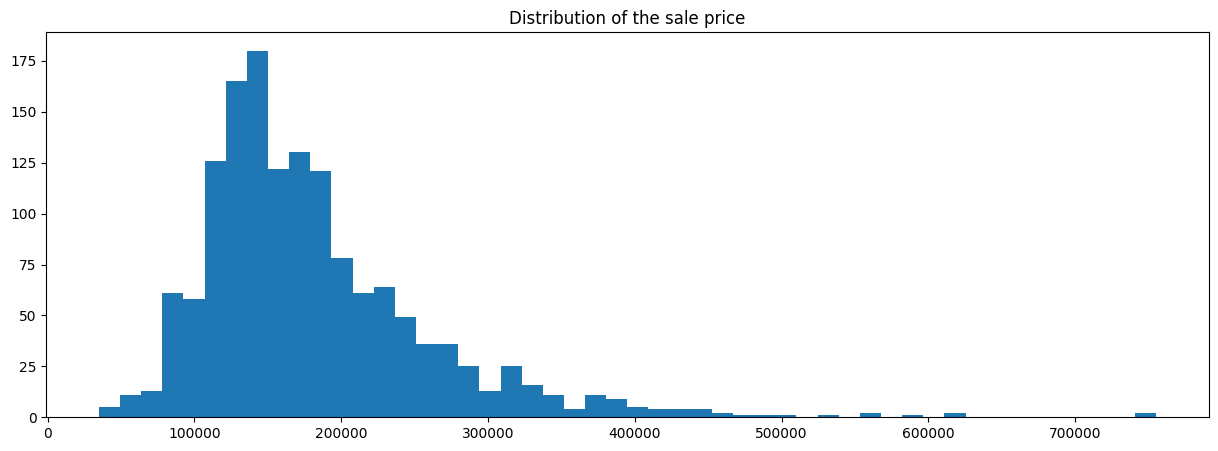

In [45]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Distribution of the sale price")
ax.hist(houses["SalePrice"], bins=50)

plt.show()

In [46]:
houses["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64